# Logistic Regression Exercise
이 연습에서는 로지스틱 회귀를 구현하고, 이를 분류 작업에 적용합니다. 또한 학습 알고리즘에 정규화를 추가하여 구현의 견고성을 향상시킬 것입니다. 더 어려운 문제에 대해 시험해 봅니다.

## 로지스틱 회귀(Logistic Regression)
이 연습의 첫 번째 부분에서는 학생이 대학에 합격 할 것인지를 예측하는 로지스틱 회귀 모델을 작성합니다. 당신이 대학의 관리자이고, 두 번의 시험에 대한 결과에 따라 각 신청자의 입학 확률을 결정한다고 가정하십시오. 이전 지원자의 과거 데이터를 사용하여 로지스틱 회귀에 대한 훈련 세트로 사용할 수 있습니다. 각 훈련 사례에는 두 가지 시험에 대한 지원자의 점수와 입학 결정이 있습니다. 이를 위해 시험 점수에 따라 입학 확률을 추정하는 분류 모델을 만들 것입니다.

### 데이타 시각화
학습 알고리즘을 구현하기 전에 가능한 경우 데이터를 시각화하는 것이 좋습니다. 다음의 코드는 데이터를 로드하고, 검토해 봅니다.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('ex2data1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


두 점수들의 스케터 플롯(scatter plot)를 만들고, 색상 코딩을 사용하여 예제가 양수(허용됨)인지  또는 음수(허용되지 않음)인지 시각화합니다.

Text(0, 0.5, 'Exam 2 Score')

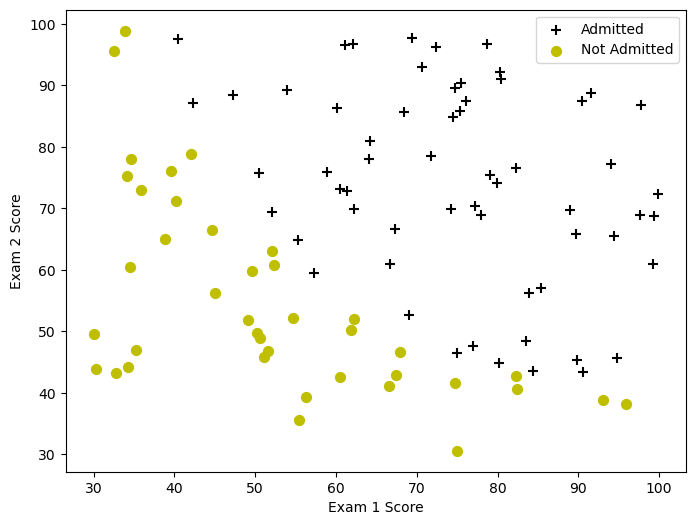

In [32]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='k', marker='+', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='y', marker='o', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

### 구현
#### 시그모이드 함수
두 클래스 사이에 명확한 결정 경계가 있는 것처럼 보입니다. 이제 결과를 예측하기 위해 모델을 훈련 할 수 있도록 로지스틱 회귀를 구현해야 합니다. 실제 비용 함수로 시작하기 전에, 로지스틱 회귀 가설은 다음과 같이 정의됨을 기억하십시오.

$$ h_\theta(x) = g(\mathbf {\theta^T x}) $$

여기에서, 함수 $g()$ 는 시그모이드 함수이며, 다음과 같이 정의됩니다.

$$ g(z) = { 1 \over (1 + e^{-z}) } $$

첫 단계는 다음과 같이 이 함수를 구현하여 나머지 프로그램에서 호출 할 수 있도록 하는 것입니다. 

In [33]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

sigmoid(z)를 호출하여 몇 가지 값을 테스트 해보십시오. x의 큰 양수 값의 경우 sigmoid는 1 에 가까워야 하지만 큰 음수 값의 경우 sigmoid는 0 에 가까워야 합니다. sigmoid(0) 은 정확히 0.5 가 됩니다. 코드는 벡터와 행렬에서도 작동해야 합니다. 행렬의 경우 함수는 모든 요소에서 시그모이드 함수를 수행해야 합니다.

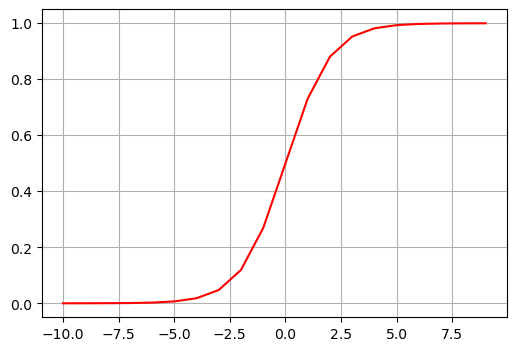

In [34]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(6,4))
ax.grid(True)
ax.plot(nums, sigmoid(nums), 'r')

#### 비용함수(cost function)와 경사(gradient)
이제 로지스틱 회귀에 대한 비용 함수와 그레디언트를 구현할 것입니다. costFunction()의 코드를 완성하여 비용과 그레디언트를 반환하십시오. 로지스틱 회귀 분석에서 비용 함수는 다음과 같다.

$$ J(\theta) = {1\over m} \sum_{i=1}^m [-y^{(i)} \log(h_\theta(x^{(i)})) - (1 - y^{(i)}) \log(1-h_\theta(x^{(i)}))] $$

비용의 기울기는 $\theta$ 와 동일한 길이의 벡터이며, 여기서 j 번째 요소 (j = 0,1, ..., n의 경우)는 다음과 같이 정의됩니다.
$$ {\partial J(\theta) \over \partial \theta_j } = {1\over m} \sum_{i=1}^m  (h_\theta(x^{(i)})-y^{(i)}) x_j^{(i)}$$
이 그레디언트는 선형회귀 기울기와 동일하게 보이지만, 선형회귀 분석에서는 $h_\theta (x)$ 의 정의가 다르기 때문에 수식이 실제로는 다릅니다.


In [35]:
#
# For ndarrays nd.multiply and * can be used for element-wise multiplication
# But, array shoud be the same size.
#
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

이제 선형회귀 분석을 위해 연습 1에서 했던 것과 비슷한 설정을 해야 합니다.

In [36]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = X.values
y = y.values
y = y[:,0]      # 1-D array's shape should be (*,), not (*,1)
theta = np.zeros(cols-1)

배열의 모양을 신속하게 확인하여, 모든 것이 잘 보이는지 확인하십시오.

In [37]:
X.shape, y.shape, theta.shape

((100, 3), (100,), (3,))

$\theta$ 의 초기 매개변수를 사용하여 cost 함수를 호출하면, 비용은 약 0.693입니다.

In [38]:
cost(theta, X, y)

69.31471805599453

다음에는 트레이닝 데이터, 레이블 및 일부 매개 변수인 theta로 주어지는 그라디언트(매개 변수 업데이트)를 계산하는 함수, "gradient()"가 필요합니다.

In [39]:
def gradient(theta, X, y):
    parameters = len(theta)
    grad = np.zeros(parameters)
    error = sigmoid(X.dot(theta)) - y
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    return grad

이 함수에서는 실제로 그라디언트 디센트를 수행하지 않습니다. 단일 그라디언트 단계만 계산합니다. 우리는 파이썬을 사용하기 때문에 SciPy의 "optimize" 네임 스페이스를 사용하여 주어진 함수를 최적화하여 비용과 그라디언트를 계산합니다.

우리의 데이터와 초기 매개 변수 값인 0을 사용하여 그라디언트 메서드에 대한 단일 호출을 살펴 보겠습니다.

In [40]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

이제 SciPy의 truncated newton (TNC) 최적화 구현을 사용하여 최적의 매개 변수를 찾을 수 있습니다.

In [41]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

  NIT   NF   F                       GTG
    0    1  6.931471805599453E+01   2.71082898E+02
    1    3  6.839022003851395E+01   7.89087138E-01
    1   47  6.839022003851395E+01   7.89087138E-01
tnc: Linear search failed


(array([4.42735730e-05, 5.31690927e-03, 4.98646266e-03]), 48, 4)

Text(0, 0.5, 'Exam 2 Score')

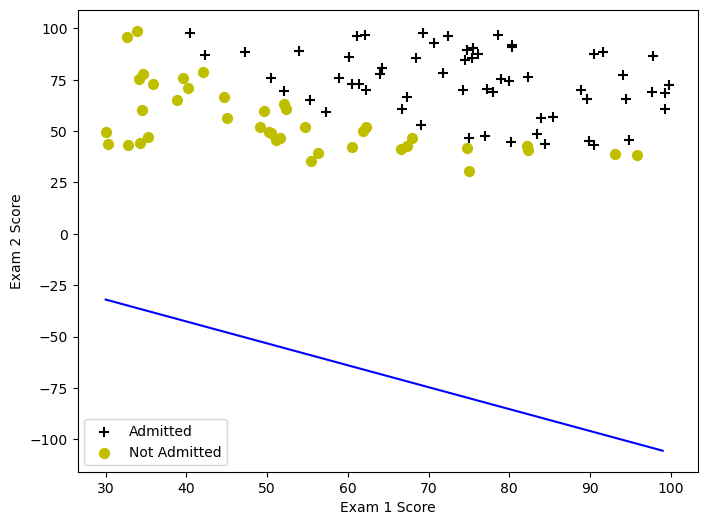

In [42]:
t1 = np.arange(30,100,1)
t2 = -(result[0][0] + t1 * result[0][1]) / result[0][2] 

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='k', marker='+', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='y', marker='o', label='Not Admitted')
ax.plot( t1, t2, 'b-')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

이 솔루션으로 우리 비용이 어떻게 생겼는지 보도록하겠습니다.

In [43]:
cost(result[0], X, y)

68.39022003851395

다음으로 우리는 학습 된 매개변수 theta를 사용하여 데이터 세트 X에 대한 예측을 출력하는 함수를 작성해야 합니다. 그런 다음, 이 함수를 사용하여 분류 기준의 학습 정확도에 점수를 매길 수 있습니다.

In [44]:
def predict(theta, X):
    probability = sigmoid(X.dot(theta.T))
    return [1 if x >= 0.5 else 0 for x in probability]

In [45]:
theta_min = result[0]
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy =',accuracy,'%')

accuracy = 60 %
